In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import defaultdict, Counter
import os
from datetime import timedelta

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
spray = pd.read_csv('spray.csv')
spray.head(20)

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858
5,2011-08-29,6:57:48 PM,42.390395,-88.088315
6,2011-08-29,6:57:58 PM,42.390673,-88.088002
7,2011-08-29,6:58:08 PM,42.391027,-88.088002
8,2011-08-29,6:58:18 PM,42.391403,-88.088003
9,2011-08-29,6:58:28 PM,42.391718,-88.087995


In [3]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


Only Time contains nan values

In [4]:
spray.loc[spray['Time'].isna(), :]

,Date,Time,Latitude,Longitude
1030,2011-09-07,NaN,41.987092,-87.794286
1031,2011-09-07,NaN,41.987620,-87.794382
1032,2011-09-07,NaN,41.988004,-87.794574
1033,2011-09-07,NaN,41.988292,-87.795486
1034,2011-09-07,NaN,41.988100,-87.796014
1035,2011-09-07,NaN,41.986372,-87.794862
1036,2011-09-07,NaN,41.986228,-87.795582
1037,2011-09-07,NaN,41.984836,-87.793998
1038,2011-09-07,NaN,41.984836,-87.794670
1039,2011-09-07,NaN,41.984884,-87.795198


take a look at the nan values 

In [5]:
spray.loc[1027:1617, :]

,Date,Time,Latitude,Longitude
1027,2011-09-07,7:44:32 PM,41.986460,-87.794225
1028,2011-09-07,7:44:32 PM,41.986460,-87.794225
1029,2011-09-07,7:44:32 PM,41.986460,-87.794225
1030,2011-09-07,NaN,41.987092,-87.794286
1031,2011-09-07,NaN,41.987620,-87.794382
1032,2011-09-07,NaN,41.988004,-87.794574
1033,2011-09-07,NaN,41.988292,-87.795486
1034,2011-09-07,NaN,41.988100,-87.796014
1035,2011-09-07,NaN,41.986372,-87.794862
1036,2011-09-07,NaN,41.986228,-87.795582


we can also see that there are duplicated rows, so let us drop those first.

In [6]:
spray.drop_duplicates(inplace=True, ignore_index=True)

In [7]:
spray.loc[spray['Time'].isna(), :]

,Date,Time,Latitude,Longitude
489,2011-09-07,NaN,41.987092,-87.794286
490,2011-09-07,NaN,41.987620,-87.794382
491,2011-09-07,NaN,41.988004,-87.794574
492,2011-09-07,NaN,41.988292,-87.795486
493,2011-09-07,NaN,41.988100,-87.796014
494,2011-09-07,NaN,41.986372,-87.794862
495,2011-09-07,NaN,41.986228,-87.795582
496,2011-09-07,NaN,41.984836,-87.793998
497,2011-09-07,NaN,41.984836,-87.794670
498,2011-09-07,NaN,41.984884,-87.795198


now look at nan values again

In [8]:
spray.loc[485:1076]

,Date,Time,Latitude,Longitude
485,2011-09-07,7:44:02 PM,41.984988,-87.793563
486,2011-09-07,7:44:12 PM,41.985455,-87.793797
487,2011-09-07,7:44:20 PM,41.985865,-87.793980
488,2011-09-07,7:44:32 PM,41.986460,-87.794225
489,2011-09-07,NaN,41.987092,-87.794286
490,2011-09-07,NaN,41.987620,-87.794382
491,2011-09-07,NaN,41.988004,-87.794574
492,2011-09-07,NaN,41.988292,-87.795486
493,2011-09-07,NaN,41.988100,-87.796014
494,2011-09-07,NaN,41.986372,-87.794862


To fill in the nan values, we need to look at the distance between consequtive locations, as well as the velocity of the plane.

In [9]:
spray['la_diff'] = spray['Latitude'].diff()
spray['lo_diff'] = spray['Longitude'].diff()

In [10]:
spray['dist'] = np.sqrt(spray['la_diff']**2+spray['lo_diff']**2)

In [11]:
spray.head()

,Date,Time,Latitude,Longitude,la_diff,lo_diff,dist
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,NaN,NaN,NaN
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,-0.000275,0.000000,0.000275
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,-0.000327,0.000007,0.000327
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,-0.000385,-0.000002,0.000385
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,-0.000227,0.000300,0.000376


next we compute velocity based on distance and time difference

In [12]:
new = spray['Date']+' '+spray['Time']
spray['datetime'] = pd.to_datetime(new)
spray.head()

,Date,Time,Latitude,Longitude,la_diff,lo_diff,dist,datetime
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,NaN,NaN,NaN,2011-08-29 18:56:58
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,-0.000275,0.000000,0.000275,2011-08-29 18:57:08
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,-0.000327,0.000007,0.000327,2011-08-29 18:57:18
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,-0.000385,-0.000002,0.000385,2011-08-29 18:57:28
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,-0.000227,0.000300,0.000376,2011-08-29 18:57:38


In [13]:
spray['time_diff'] = spray['datetime'].diff().astype('timedelta64[s]')
spray.head()

,Date,Time,Latitude,Longitude,la_diff,lo_diff,dist,datetime,time_diff
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,NaN,NaN,NaN,2011-08-29 18:56:58,NaN
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,-0.000275,0.000000,0.000275,2011-08-29 18:57:08,10.0
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,-0.000327,0.000007,0.000327,2011-08-29 18:57:18,10.0
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,-0.000385,-0.000002,0.000385,2011-08-29 18:57:28,10.0
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,-0.000227,0.000300,0.000376,2011-08-29 18:57:38,10.0


In [14]:
spray['velocity'] = spray['dist']/spray['time_diff']
spray.head()

,Date,Time,Latitude,Longitude,la_diff,lo_diff,dist,datetime,time_diff,velocity
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,NaN,NaN,NaN,2011-08-29 18:56:58,NaN,NaN
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,-0.000275,0.000000,0.000275,2011-08-29 18:57:08,10.0,0.000028
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,-0.000327,0.000007,0.000327,2011-08-29 18:57:18,10.0,0.000033
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,-0.000385,-0.000002,0.000385,2011-08-29 18:57:28,10.0,0.000039
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,-0.000227,0.000300,0.000376,2011-08-29 18:57:38,10.0,0.000038


In [15]:
spray.loc[484:1076].head(20)

,Date,Time,Latitude,Longitude,la_diff,lo_diff,dist,datetime,time_diff,velocity
484,2011-09-07,7:43:40 PM,41.983917,-87.793088,0.000547,-0.000247,0.000600,2011-09-07 19:43:40,10.0,0.000060
485,2011-09-07,7:44:02 PM,41.984988,-87.793563,0.001072,-0.000475,0.001172,2011-09-07 19:44:02,22.0,0.000053
486,2011-09-07,7:44:12 PM,41.985455,-87.793797,0.000467,-0.000233,0.000522,2011-09-07 19:44:12,10.0,0.000052
487,2011-09-07,7:44:20 PM,41.985865,-87.793980,0.000410,-0.000183,0.000449,2011-09-07 19:44:20,8.0,0.000056
488,2011-09-07,7:44:32 PM,41.986460,-87.794225,0.000595,-0.000245,0.000643,2011-09-07 19:44:32,12.0,0.000054
489,2011-09-07,NaN,41.987092,-87.794286,0.000632,-0.000061,0.000635,NaT,NaN,NaN
490,2011-09-07,NaN,41.987620,-87.794382,0.000528,-0.000096,0.000537,NaT,NaN,NaN
491,2011-09-07,NaN,41.988004,-87.794574,0.000384,-0.000192,0.000429,NaT,NaN,NaN
492,2011-09-07,NaN,41.988292,-87.795486,0.000288,-0.000912,0.000956,NaT,NaN,NaN
493,2011-09-07,NaN,41.988100,-87.796014,-0.000192,-0.000528,0.000562,NaT,NaN,NaN


From the analysis above, between each consequtive location, the time difference is about 10s. For the columns that Time is missing, the distance between two consequetive locations are about the same as the previous ones, so we expect the time difference between them is about 10s. But before the first nan value, the time is 7:44:32, after the last nan value the time is 7:46:30, so we expect to have about 12 locations in between. On the other hand, we have more than 500 missing values, which does not make sense. 

Because we do not know the origin of the errors, we do not have a good strategy to fill it. On the other hand, to make predictions for a specific date, we only need to know whether there were spray on that date(or on the previous day). So one may discard the Time column, only use the latitude and longitude and date. 

In [16]:
spray.groupby('Date').agg('size')

Date
2011-08-29      95
2011-09-07    1573
2013-07-17    2202
2013-07-25    1607
2013-08-08    1195
2013-08-15    2668
2013-08-16     141
2013-08-22    1587
2013-08-29    2302
2013-09-05     924
dtype: int64

In [17]:
train = pd.read_csv('train.csv')
train.head(5)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [19]:
train.isna().sum().sort_values(ascending=False)

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

No nan values. Take a look at categorical features

In [20]:
train['Address'].value_counts().sort_values(ascending=False)

ORD Terminal 5, O'Hare International Airport, Chicago, IL 60666, USA                         750
South Doty Avenue, Chicago, IL, USA                                                          542
South Stony Island Avenue, Chicago, IL, USA                                                  314
4100 North Oak Park Avenue, Chicago, IL 60634, USA                                           185
4200 West 127th Street, Alsip, IL 60803, USA                                                 183
2200 North Cannon Drive, Chicago, IL 60614, USA                                              163
2400 East 105th Street, Chicago, IL 60617, USA                                               160
7000 West Armitage Avenue, Chicago, IL 60707, USA                                            156
3700 118th Street, Chicago, IL 60617, USA                                                    152
University of Illinois at Chicago, 1100 South Ashland Avenue, Chicago, IL 60607, USA         151
5200 South Kolmar Avenue, Chic

One place has address Chicago, IL, USA, which does not make much sense, let us take a look

In [21]:
train.loc[train.Address=='Chicago, IL, USA', :].head(10)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
69,2007-06-05,"Chicago, IL, USA",CULEX RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,3,0
127,2007-06-26,"Chicago, IL, USA",CULEX RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0
179,2007-06-29,"Chicago, IL, USA",CULEX RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0
237,2007-07-02,"Chicago, IL, USA",CULEX SALINARIUS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0
342,2007-07-11,"Chicago, IL, USA",CULEX PIPIENS/RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,3,0
343,2007-07-11,"Chicago, IL, USA",CULEX RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0
557,2007-07-19,"Chicago, IL, USA",CULEX PIPIENS/RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0
728,2007-07-27,"Chicago, IL, USA",CULEX PIPIENS/RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,4,0
729,2007-07-27,"Chicago, IL, USA",CULEX RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,2,0
929,2007-08-01,"Chicago, IL, USA",CULEX PIPIENS/RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,6,0


To get accurate address, block number, street number appears to be more reliable.

In [22]:
train['Block'].value_counts().sort_values(ascending=False)

10    1722
11     736
12     605
22     500
13     345
37     330
17     305
42     300
70     295
52     277
58     252
50     244
35     229
61     228
25     218
40     189
41     185
33     179
39     177
24     160
89     157
36     133
71     133
51     132
46     122
82     120
65     117
60     116
67     116
91     111
79     109
28      98
45      98
14      97
77      92
43      91
15      90
30      90
63      86
90      77
75      69
38      68
72      66
64      63
48      60
62      56
53      51
21      49
18      43
49      39
81      36
96      31
73      30
68      29
20      25
98      23
93      21
66      21
47      20
27      17
80      13
34       7
55       5
29       3
Name: Block, dtype: int64

In [23]:
train['Street'].value_counts().sort_values(ascending=False)

 W OHARE AIRPORT                  750
 S DOTY AVE                       542
 S STONY ISLAND AVE               347
 S ASHLAND AVE                    266
 N OAK PARK AVE                   216
 W 51ST ST                        185
 W 127TH PL                       183
 N PULASKI RD                     173
 N CANNON DR                      172
 E 105TH ST                       160
  W ARMITAGE AVENUE               156
 W 95TH ST                        154
 E 118TH ST                       152
 S KOLMAR                         148
 W 116TH ST                       147
 W ROOSEVELT                      146
 S CENTRAL AVE                    146
 W OHARE                          140
 N MOSELL AVE                     139
 N PITTSBURGH AVE                 133
 S BRANDON                        130
 S KEDZIE AVE                     129
 S TORRENCE AVE                   129
 E 67TH ST                        128
 N CENTRAL PARK DR                126
 N MILWAUKEE AVE                  122
 N WESTERN A

ONe street number has a white space, let us remove it.

In [24]:
train['Street'] = train['Street'].str.strip()

In [25]:
train['AddressNumberAndStreet'].value_counts().sort_values(ascending=False)

1000  W OHARE AIRPORT, Chicago, IL                  750
1200  S DOTY AVE, Chicago, IL                       542
1000  S STONY ISLAND AVE, Chicago, IL               314
4100  N OAK PARK AVE, Chicago, IL                   185
4200  W 127TH PL, Chicago, IL                       183
2200  N CANNON DR, Chicago, IL                      163
2400  E 105TH ST, Chicago, IL                       160
7000   W ARMITAGE AVENUE, Chicago, IL               156
3700  E 118TH ST, Chicago, IL                       152
1100  S ASHLAND AVE, Chicago, IL                    151
5200  S KOLMAR, Chicago, IL                         148
3500  W 116TH ST, Chicago, IL                       147
1100  W ROOSEVELT, Chicago, IL                      146
5000  S CENTRAL AVE, Chicago, IL                    146
1000  W OHARE, Chicago, IL                          140
7000  N MOSELL AVE, Chicago, IL                     139
3600  N PITTSBURGH AVE, Chicago, IL                 133
1300  S BRANDON, Chicago, IL                    

AddressNumberAndStreet also has some incorrect white spaces, need to correct those

In [26]:
train['AddressNumberAndStreet'] = train['AddressNumberAndStreet'].str.split().apply(lambda x:' '.join(x))

In [27]:
train['AddressNumberAndStreet'].value_counts().sort_values(ascending=False)

1000 W OHARE AIRPORT, Chicago, IL                  750
1200 S DOTY AVE, Chicago, IL                       542
1000 S STONY ISLAND AVE, Chicago, IL               314
4100 N OAK PARK AVE, Chicago, IL                   185
4200 W 127TH PL, Chicago, IL                       183
2200 N CANNON DR, Chicago, IL                      163
2400 E 105TH ST, Chicago, IL                       160
7000 W ARMITAGE AVENUE, Chicago, IL                156
3700 E 118TH ST, Chicago, IL                       152
1100 S ASHLAND AVE, Chicago, IL                    151
5200 S KOLMAR, Chicago, IL                         148
3500 W 116TH ST, Chicago, IL                       147
1100 W ROOSEVELT, Chicago, IL                      146
5000 S CENTRAL AVE, Chicago, IL                    146
1000 W OHARE, Chicago, IL                          140
7000 N MOSELL AVE, Chicago, IL                     139
3600 N PITTSBURGH AVE, Chicago, IL                 133
1300 S BRANDON, Chicago, IL                        130
1300 S TOR

In [28]:
train['Species'].value_counts().sort_values(ascending=False)

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

nothing abnormal, except CULEX ERRATICUS only appears once, which might be an issue later.

In [29]:
train['Trap'].value_counts().sort_values(ascending=False)

T900     750
T115     542
T138     314
T002     185
T135     183
T054     163
T128     160
T151     156
T212     152
T090     151
T114     148
T158     147
T048     146
T031     146
T903     140
T008     139
T011     133
T209     130
T200     129
T073     128
T030     126
T003     122
T094     121
T028     117
T066     116
T074     115
T047     114
T221     112
T102     112
T159     111
T009     111
T046     110
T065     109
T012     105
T063     104
T013     104
T225     103
T061     103
T147      98
T082      98
T220      98
T033      97
T027      93
T152      93
T080      92
T145      91
T089      91
T160      91
T095      90
T223      87
T086      86
T155      86
T049      85
T103      83
T069      83
T079      83
T062      82
T039      80
T227      78
T017      78
T226      77
T144      74
T218      74
T083      74
T035      72
T148      69
T016      66
T230      65
T043      63
T018      63
T235      62
T228      62
T222      60
T224      54
T233      50
T096      50
T232      50

Trap data looks fine, but again, some of the data only appears 2 or 3 times, might be a problem.

In [30]:
train.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [31]:
train['datetime'] = pd.to_datetime(train['Date'])
train['month'] = train['datetime'].dt.month
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,datetime,month
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007-05-29,5
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007-05-29,5
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007-05-29,5
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,2007-05-29,5
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,2007-05-29,5


In [32]:
weather = pd.read_csv('cleaned_weather.csv')
weather['datetime'] = pd.to_datetime(weather['datetime'])
weather.head()


,Unnamed: 0,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,water_equiv_snowfall,station_pressure,sealevel_pressure,wind_speed,wind_direction,avg_wind_speed,datetime,year,month,day,wind_direction_cos,wind_direction_sin,TS,GR,RA,DZ,SN,FG,BR,HZ,FU,SQ,MI,BC,VC,FG+,MD
0,0,1,83,50,67.0,14.0,51,56.0,0.0,2.0,448,1849,0.0,29.10,29.82,1.7,270,9.2,2007-05-01,2007,5,1,-1.836970e-16,-1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,2,84,52,68.0,14.0,51,57.0,0.0,3.0,448,1849,0.0,29.18,29.82,2.7,250,9.6,2007-05-01,2007,5,1,-3.420201e-01,-0.939693,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,1,59,42,51.0,-3.0,42,47.0,14.0,0.0,447,1850,0.0,29.38,30.09,13.0,40,13.4,2007-05-02,2007,5,2,7.660444e-01,0.642788,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,3,2,60,43,52.0,-3.0,42,47.0,13.0,0.0,447,1850,0.0,29.44,30.08,13.3,20,13.4,2007-05-02,2007,5,2,9.396926e-01,0.342020,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,4,1,66,46,56.0,2.0,40,48.0,9.0,0.0,446,1851,0.0,29.39,30.12,11.7,70,11.9,2007-05-03,2007,5,3,3.420201e-01,0.939693,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Let us add latitude and longitude of ohare and midway stations in weather data

In [33]:
station_lat = {1:41.995, 2:41.786}
station_lon = {1:-87.933, 2:-87.752}

weather['lat'] = weather['Station'].map(station_lat)
weather['lon'] = weather['Station'].map(station_lon)

In [34]:
weather.drop(columns=['Unnamed: 0', 'month', 'year', 'day'], inplace=True)

separate ohare station and midway station, form two dataframes, then join them with train on date.

In [35]:
ohare, midway = weather.loc[weather.Station==1,:].copy().reset_index(), weather.loc[weather.Station==2,:].copy().reset_index()

In [36]:
ohare.drop(columns=['Station'], inplace=True)
midway.drop(columns=['Station'], inplace=True)

In [37]:
combine = ohare.merge(midway, how='left', on='datetime', suffixes=('_ohare', '_midway'))

In [38]:
df = train.merge(combine, how='left', on='datetime')
df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,datetime,month,index_ohare,Tmax_ohare,Tmin_ohare,Tavg_ohare,Depart_ohare,DewPoint_ohare,WetBulb_ohare,Heat_ohare,Cool_ohare,Sunrise_ohare,Sunset_ohare,water_equiv_snowfall_ohare,station_pressure_ohare,sealevel_pressure_ohare,wind_speed_ohare,wind_direction_ohare,avg_wind_speed_ohare,wind_direction_cos_ohare,wind_direction_sin_ohare,TS_ohare,GR_ohare,RA_ohare,DZ_ohare,SN_ohare,FG_ohare,BR_ohare,HZ_ohare,FU_ohare,SQ_ohare,MI_ohare,BC_ohare,VC_ohare,FG+_ohare,MD_ohare,lat_ohare,lon_ohare,index_midway,Tmax_midway,Tmin_midway,Tavg_midway,Depart_midway,DewPoint_midway,WetBulb_midway,Heat_midway,Cool_midway,Sunrise_midway,Sunset_midway,water_equiv_snowfall_midway,station_pressure_midway,sealevel_pressure_midway,wind_speed_midway,wind_direction_midway,avg_wind_speed_midway,wind_direction_cos_midway,wind_direction_sin_midway,TS_midway,GR_midway,RA_midway,DZ_midway,SN_midway,FG_midway,BR_midway,HZ_midway,FU_midway,SQ_midway,MI_midway,BC_midway,VC_midway,FG+_midway,MD_midway,lat_midway,lon_midway
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007-05-29,5,56,88,60,74.0,10.0,58,65.0,0.0,9.0,421,1917,0.0,29.39,30.11,5.8,180,6.5,-1.0,1.224647e-16,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,41.995,-87.933,57,88,65,77.0,10.0,59,66.0,0.0,12.0,421,1917,0.0,29.44,30.09,5.8,160,7.4,-0.939693,0.34202,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,41.786,-87.752
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007-05-29,5,56,88,60,74.0,10.0,58,65.0,0.0,9.0,421,1917,0.0,29.39,30.11,5.8,180,6.5,-1.0,1.224647e-16,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,41.995,-87.933,57,88,65,77.0,10.0,59,66.0,0.0,12.0,421,1917,0.0,29.44,30.09,5.8,160,7.4,-0.939693,0.34202,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,41.786,-87.752
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007-05-29,5,56,88,60,74.0,10.0,58,65.0,0.0,9.0,421,1917,0.0,29.39,30.11,5.8,180,6.5,-1.0,1.224647e-16,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,41.995,-87.933,57,88,65,77.0,10.0,59,66.0,0.0,12.0,421,1917,0.0,29.44,30.09,5.8,160,7.4,-0.939693,0.34202,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,41.786,-87.752
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,2007-05-29,5,56,88,60,74.0,10.0,58,65.0,0.0,9.0,421,1917,0.0,29.39,30.11,5.8,180,6.5,-1.0,1.224647e-16,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,41.995,-87.933,57,88,65,77.0,10.0,59,66.0,0.0,12.0,421,1917,0.0,29.44,30.09,5.8,160,7.4,-0.939693,0.34202,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,41.786,-87.752
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,2007-05-29,5,56,88,60,74.0,10.0,58,65.0,0.0,9.0,421,1917,0.0,29.39,30.11,5.8,180,6.5,-1.0,1.224647e-16,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,41.995,-87.933,57,88,65,77.0,10.0,59,66.0,0.0,12.0,421,1917,0.0,29.44,30.09,5.8,160,7.4,-0.939693,0.34202,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,41.786,-87.752


let us make a virus_density plot

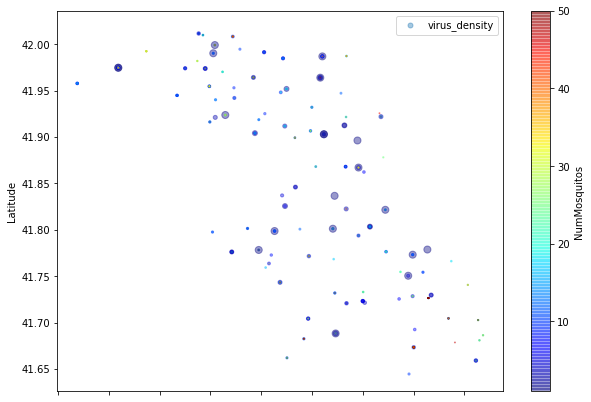

In [39]:
train.plot(kind="scatter", x="Longitude", y="Latitude",
    s=50*train['WnvPresent']/train['NumMosquitos'], label="virus_density",
    c="NumMosquitos", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

Now for each trap location and each day, we shall find the nearest spray location for the trap location, if there were spray at all. we shall determine the distant to the nearest spray location, the latitude difference from nearest spray location, the longitude difference from nearest spray location. If there were no spray on that day, we fill in the latitude and longitude difference by 1, fill in distance by 1.414. We shall also generate a column called has_spray

In [40]:
def nearest_spray(data):
    spray_date = spray['Date'].unique()
    res = [1.414 for i in range(0,data.shape[0])]
    lat_diff = [1 for i in range(0,data.shape[0])]
    lon_diff = [1 for i in range(0,data.shape[0])]
    has_spray = [0 for i in range(0,data.shape[0])]
    for i in range(0,data.shape[0]):
        if data['Date'].values[i] in spray_date:
            spray_lat = spray['Latitude'].values[spray.Date.values==data['Date'].values[i]]
            spray_lon = spray['Longitude'].values[spray.Date.values==data['Date'].values[i]]
            temp = np.sqrt((spray_lat-data['Latitude'].values[i])**2+(spray_lon-data['Longitude'].values[i])**2)
            res[i] = temp.min()
            idx = temp.argmin()
            lat_diff[i]=data['Latitude'].values[i]-spray_lat[idx]
            lon_diff[i]=data['Longitude'].values[i]-spray_lon[idx]
            has_spray[i] = 1
    return np.array(res), np.array(has_spray), np.array(lat_diff), np.array(lon_diff)
        

In [41]:
df['spray_dist'], df['has_spray'], df['lat_diff'], df['lon_diff'] = nearest_spray(df)

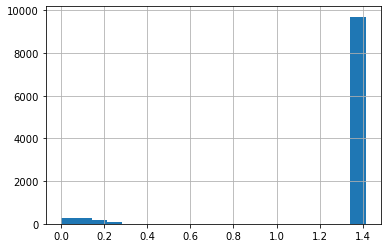

In [42]:
df['spray_dist'].hist(bins=20)
plt.show()

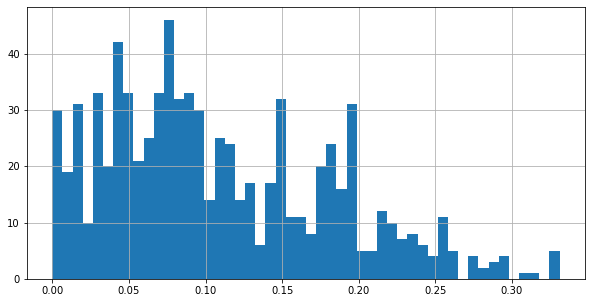

In [43]:
df['spray_dist'][df.spray_dist<0.5].hist(bins=50, figsize=(10,5))
plt.show()

For each trap location, we also compute its distance to ohare as well as midway, the longitude/latitude difference from the trap location to ohare and midway

In [44]:
df['ohare_dist'] = np.sqrt((df['Latitude']-df['lat_ohare'])**2+(df['Longitude']-df['lon_ohare'])**2)
df['ohare_lat_diff'] = df['Latitude']-df['lat_ohare']
df['ohare_lon_diff'] = df['Longitude']-df['lon_ohare']
df['midway_dist'] = np.sqrt((df['Latitude']-df['lat_midway'])**2+(df['Longitude']-df['lon_midway'])**2)
df['midway_lat_diff'] = df['Latitude']-df['lat_midway']
df['midway_lon_diff'] = df['Longitude']-df['lon_midway']

In [45]:
df.head(3)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,datetime,month,index_ohare,Tmax_ohare,Tmin_ohare,Tavg_ohare,Depart_ohare,DewPoint_ohare,WetBulb_ohare,Heat_ohare,Cool_ohare,Sunrise_ohare,Sunset_ohare,water_equiv_snowfall_ohare,station_pressure_ohare,sealevel_pressure_ohare,wind_speed_ohare,wind_direction_ohare,avg_wind_speed_ohare,wind_direction_cos_ohare,wind_direction_sin_ohare,TS_ohare,GR_ohare,RA_ohare,DZ_ohare,SN_ohare,FG_ohare,BR_ohare,HZ_ohare,FU_ohare,SQ_ohare,MI_ohare,BC_ohare,VC_ohare,FG+_ohare,MD_ohare,lat_ohare,lon_ohare,index_midway,Tmax_midway,Tmin_midway,Tavg_midway,Depart_midway,DewPoint_midway,WetBulb_midway,Heat_midway,Cool_midway,Sunrise_midway,Sunset_midway,water_equiv_snowfall_midway,station_pressure_midway,sealevel_pressure_midway,wind_speed_midway,wind_direction_midway,avg_wind_speed_midway,wind_direction_cos_midway,wind_direction_sin_midway,TS_midway,GR_midway,RA_midway,DZ_midway,SN_midway,FG_midway,BR_midway,HZ_midway,FU_midway,SQ_midway,MI_midway,BC_midway,VC_midway,FG+_midway,MD_midway,lat_midway,lon_midway,spray_dist,has_spray,lat_diff,lon_diff,ohare_dist,ohare_lat_diff,ohare_lon_diff,midway_dist,midway_lat_diff,midway_lon_diff
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007-05-29,5,56,88,60,74.0,10.0,58,65.0,0.0,9.0,421,1917,0.0,29.39,30.11,5.8,180,6.5,-1.0,1.224647e-16,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,41.995,-87.933,57,88,65,77.0,10.0,59,66.0,0.0,12.0,421,1917,0.0,29.44,30.09,5.8,160,7.4,-0.939693,0.34202,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,41.786,-87.752,1.414,0,1.0,1.0,0.138026,-0.040310,0.132009,0.175660,0.168690,-0.048991
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007-05-29,5,56,88,60,74.0,10.0,58,65.0,0.0,9.0,421,1917,0.0,29.39,30.11,5.8,180,6.5,-1.0,1.224647e-16,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,41.995,-87.933,57,88,65,77.0,10.0,59,66.0,0.0,12.0,421,1917,0.0,29.44,30.09,5.8,160,7.4,-0.939693,0.34202,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,41.786,-87.752,1.414,0,1.0,1.0,0.138026,-0.040310,0.132009,0.175660,0.168690,-0.048991
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007-05-29,5,56,88,60,74.0,10.0,58,65.0,0.0,9.0,421,1917,0.0,29.39,30.11,5.8,180,6.5,-1.0,1.224647e-16,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,41.995,-87.933,57,88,65,77.0,10.0,59,66.0,0.0,12.0,421,1917,0.0,29.44,30.09,5.8,160,7.4,-0.939693,0.34202,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,41.786,-87.752,1.414,0,1.0,1.0,0.163721,-0.000009,0.163721,0.209704,0.208991,-0.017279


For spray feature, we may need to shift it because the effect of a spray may show up only in the next day, so let us generate the corresponding features for spray in the previous day.

In [46]:
d = timedelta(days=1)

In [47]:
temp = df[['datetime', 'Latitude', 'Longitude']].copy()
temp.head(2)

,datetime,Latitude,Longitude
0,2007-05-29,41.95469,-87.800991
1,2007-05-29,41.95469,-87.800991


In [48]:
temp['datetime'] = temp['datetime']-d
temp.head(2)

,datetime,Latitude,Longitude
0,2007-05-28,41.95469,-87.800991
1,2007-05-28,41.95469,-87.800991


In [49]:
temp['Date'] = temp['datetime'].dt.strftime('%Y-%m-%d')

In [50]:
df['pre_spray_dist'], df['pre_has_spray'], df['pre_lat_diff'], df['pre_lon_diff'] = nearest_spray(temp)

In [51]:
df.head(3)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,datetime,month,index_ohare,Tmax_ohare,Tmin_ohare,Tavg_ohare,Depart_ohare,DewPoint_ohare,WetBulb_ohare,Heat_ohare,Cool_ohare,Sunrise_ohare,Sunset_ohare,water_equiv_snowfall_ohare,station_pressure_ohare,sealevel_pressure_ohare,wind_speed_ohare,wind_direction_ohare,avg_wind_speed_ohare,wind_direction_cos_ohare,wind_direction_sin_ohare,TS_ohare,GR_ohare,RA_ohare,DZ_ohare,SN_ohare,FG_ohare,BR_ohare,HZ_ohare,FU_ohare,SQ_ohare,MI_ohare,BC_ohare,VC_ohare,FG+_ohare,MD_ohare,lat_ohare,lon_ohare,index_midway,Tmax_midway,Tmin_midway,Tavg_midway,Depart_midway,DewPoint_midway,WetBulb_midway,Heat_midway,Cool_midway,Sunrise_midway,Sunset_midway,water_equiv_snowfall_midway,station_pressure_midway,sealevel_pressure_midway,wind_speed_midway,wind_direction_midway,avg_wind_speed_midway,wind_direction_cos_midway,wind_direction_sin_midway,TS_midway,GR_midway,RA_midway,DZ_midway,SN_midway,FG_midway,BR_midway,HZ_midway,FU_midway,SQ_midway,MI_midway,BC_midway,VC_midway,FG+_midway,MD_midway,lat_midway,lon_midway,spray_dist,has_spray,lat_diff,lon_diff,ohare_dist,ohare_lat_diff,ohare_lon_diff,midway_dist,midway_lat_diff,midway_lon_diff,pre_spray_dist,pre_has_spray,pre_lat_diff,pre_lon_diff
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007-05-29,5,56,88,60,74.0,10.0,58,65.0,0.0,9.0,421,1917,0.0,29.39,30.11,5.8,180,6.5,-1.0,1.224647e-16,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,41.995,-87.933,57,88,65,77.0,10.0,59,66.0,0.0,12.0,421,1917,0.0,29.44,30.09,5.8,160,7.4,-0.939693,0.34202,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,41.786,-87.752,1.414,0,1.0,1.0,0.138026,-0.040310,0.132009,0.175660,0.168690,-0.048991,1.414,0,1.0,1.0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007-05-29,5,56,88,60,74.0,10.0,58,65.0,0.0,9.0,421,1917,0.0,29.39,30.11,5.8,180,6.5,-1.0,1.224647e-16,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,41.995,-87.933,57,88,65,77.0,10.0,59,66.0,0.0,12.0,421,1917,0.0,29.44,30.09,5.8,160,7.4,-0.939693,0.34202,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,41.786,-87.752,1.414,0,1.0,1.0,0.138026,-0.040310,0.132009,0.175660,0.168690,-0.048991,1.414,0,1.0,1.0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007-05-29,5,56,88,60,74.0,10.0,58,65.0,0.0,9.0,421,1917,0.0,29.39,30.11,5.8,180,6.5,-1.0,1.224647e-16,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,41.995,-87.933,57,88,65,77.0,10.0,59,66.0,0.0,12.0,421,1917,0.0,29.44,30.09,5.8,160,7.4,-0.939693,0.34202,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,41.786,-87.752,1.414,0,1.0,1.0,0.163721,-0.000009,0.163721,0.209704,0.208991,-0.017279,1.414,0,1.0,1.0


In [52]:
df.to_csv('joined_data.csv')